In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import keras
from keras.datasets import fashion_mnist
from keras.datasets import mnist

Using TensorFlow backend.


In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_dims = X_train[0].shape
max_ = X_train.max() # 255
X_train = X_train.reshape(X_train.shape[0], -1) / max_
X_test = X_test.reshape(X_test.shape[0], -1) / max_

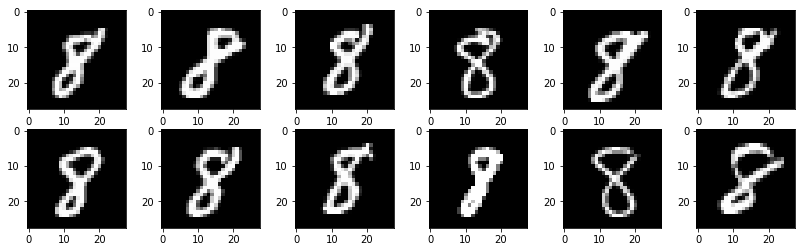

In [13]:
bags = X_train[y_train==8]
plt.figure(figsize=(14,4))
for i in range(12):
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(bags[i].reshape(img_dims), cmap='gray')

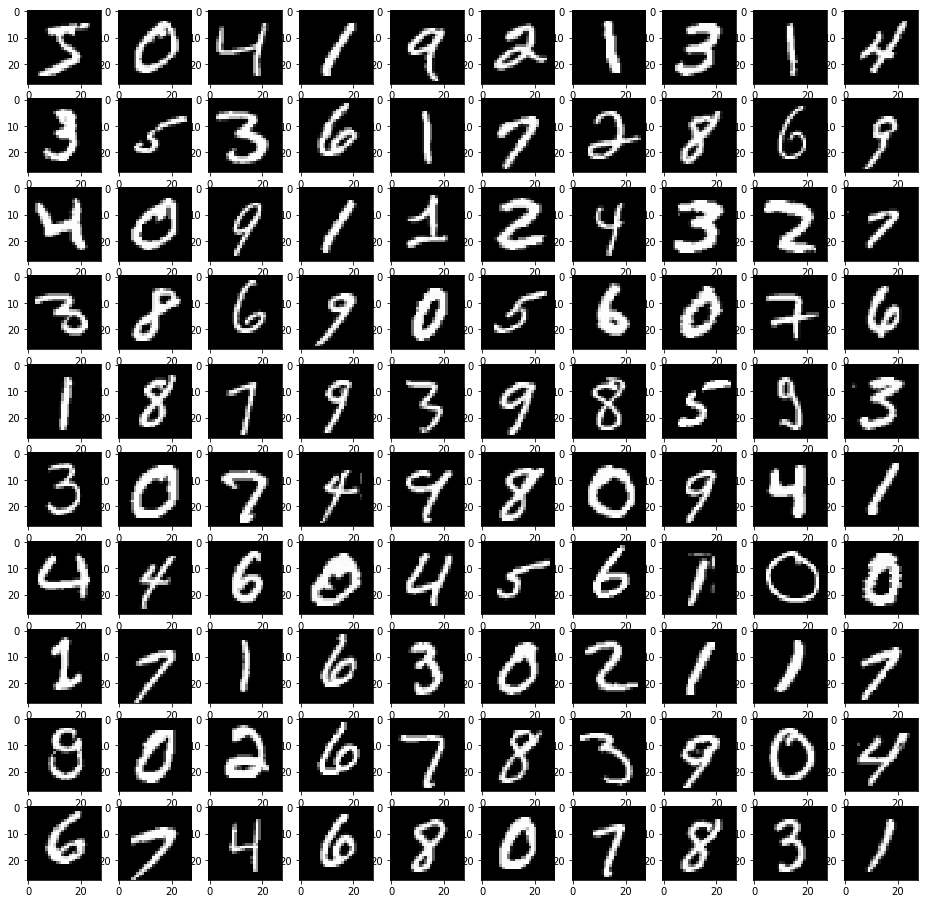

In [58]:
plt.figure(figsize=(16,16))
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_train[i].reshape(img_dims), cmap='gray')

In [19]:
X_train_mu = X_train.mean(axis=0)

In [20]:
U, s, V = np.linalg.svd(X_train - X_train_mu, full_matrices=False)

In [56]:
V.shape

(784, 784)

In [49]:
np.dot(V, (X_train - X_train_mu).T)[0]

array([ 0.48601015,  3.96752304, -0.2033318 , ..., -0.69824882,
        0.51218067, -0.68014099])

In [52]:
np.dot(X_train - X_train_mu, V.T,)[:, 0]

array([ 0.48601015,  3.96752304, -0.2033318 , ..., -0.69824882,
        0.51218067, -0.68014099])

In [54]:
X_train_reduced = (V @ (X_train - X_train_mu).T).T

In [55]:
X_train_reproduced = (V[:20,:].T @ X_train_reduced[:,:20]) + X_train_mu 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 60000 is different from 20)

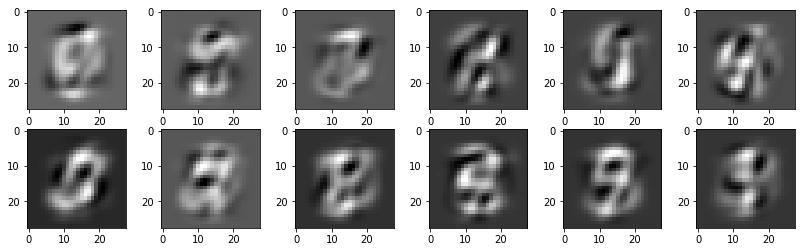

In [48]:
plt.figure(figsize=(14,4))
for i in range(12):
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(X_train_reproduced[i].reshape(img_dims), cmap='gray')

In [28]:
transformers1 = []
#transformers1.append( ('flattener', Flattener()) )
transformers1.append( ('scaler', StandardScaler((0, 1))) )
transformers1.append( ('pca', TruncatedSVD(20)) )
pipe1 = Pipeline(transformers1)
pipe1.fit(X_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=(0, 1), with_mean=True, with_std=True)), ('pca', TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
       random_state=None, tol=0.0))])

In [29]:
transformers2 = []
#transformers2.append( ('flattener', Flattener()) )
transformers2.append( ('scaler', StandardScaler()) )
transformers2.append( ('pca', PCA(20)) )
pipe2 = Pipeline(transformers2)
pipe2.fit(X_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [31]:
X_train_reconstruct1 = pipe1.inverse_transform(pipe1.transform(X_train))
X_train_reconstruct2 = pipe2.inverse_transform(pipe2.transform(X_train))

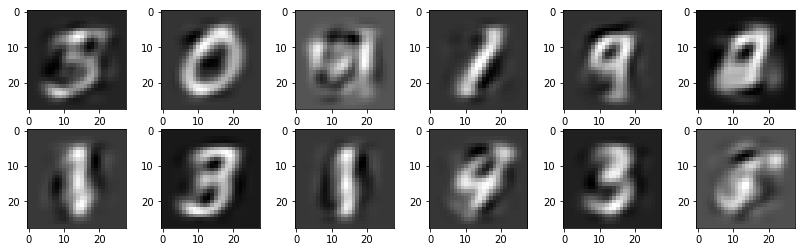

In [33]:
plt.figure(figsize=(14,4))
for i in range(12):
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(X_train_reconstruct1[i].reshape(img_dims), cmap='gray', interpolation='nearest')

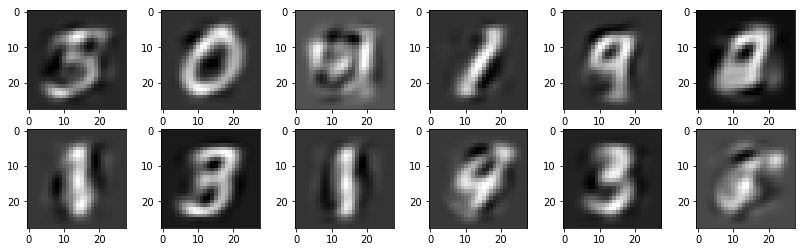

In [35]:
plt.figure(figsize=(14,4))
for i in range(12):
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(X_train_reconstruct2[i].reshape(img_dims), cmap='gray')

In [166]:
from sklearn.base import BaseEstimator, TransformerMixin

class Flattener(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        self.type = X.dtype
        self.dims = X.shape
        return self
        
    def transform(self, X):
        return X.reshape(self.dims[0], -1).astype('float64')
    
    def inverse_transform(self, X):
        return X.reshape(self.dims)

In [98]:
flattener = Flattener()
scaler = MinMaxScaler()
dim_reducer = TruncatedSVD(n_components=20)

In [99]:
transformers = [('flattener', flattener), ('scaler', scaler), ('dim_reducer', dim_reducer)]
pipe = Pipeline(transformers)

In [101]:
X_train_2 = pipe.fit_transform(X_train)

In [42]:
raveler.transform(X_train).shape

(47040000,)

In [34]:
X_train_flat[188]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        81, 113, 103, 112,  22,   0,   1,   0,   0,   0,   0,   3,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
        91, 231, 231, 203, 180, 221, 198,   0,   0,   1,   2,   0,   1,
         4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0, 109, 241, 210, 196, 214, 232, 221,  20,   0,   0,   0,
         1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  46, 135, 168, 203, 215, 225, 222, 201, 194, 220, 185,
       115,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2,   0,   0, 157, 197, 200, 179, 179, 213, 200, 166, 173, 189,
       188, 197, 211, 195,   1,   0,   3,   0,   0,   0,   0,   0,   0,
         0,   0,   5,   0, 115, 210, 175, 182, 174, 147, 166, 176, 179,
       190, 193, 184, 191, 183, 234, 128,   0,   3,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0, 176, 193, 178, 185, 171, 17

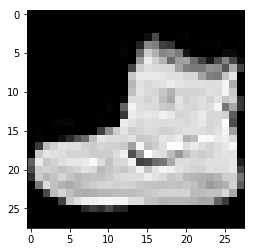

In [13]:
imshow(X_train[0], cmap='gray')

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train_flat)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.